In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.decomposition as sk
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load data file

In [2]:
demo2017 ='D:\Jupyter_File\Hackaton_Friday\Dataset_haag\Themes_2017.xls'
demo2014 ='D:\Jupyter_File\Hackaton_Friday\Dataset_haag\Themes_2014.xls'
vote2014 ='D:\\Jupyter_File\\Hackaton_Friday\\Dataset_haag\\voting_2014.csv'
vote2017 = 'D:\\Jupyter_File\\Hackaton_Friday\\Dataset_haag\\House of Representatives 2017 - Districts.csv'

#data = 'D:\Jupyter_File\Hackaton_Friday\Data.xls'

df_ori_demo2017 = pd.read_excel(demo2017,index_col=None, header=0, convert_float= True,decimal =',')
df_ori_demo2017 = df_ori_demo2017.set_index('Themes 2017 - Districts').transpose()
df_ori_demo2014 = pd.read_excel(demo2014,index_col=None, header=0, convert_float= True,decimal =',')
df_ori_demo2014 = df_ori_demo2014.set_index('Themes 2014 - Districts').transpose()
df_ori_vote2014  = pd.read_csv(vote2014,index_col=None, header=0)
df_ori_vote2014 = df_ori_vote2014.set_index('Wijken')
df_ori_vote2017  = pd.read_csv(vote2017,index_col=None, header=0)
df_ori_vote2017 = df_ori_vote2017.set_index('Wijken')

df_demo2014 = df_ori_demo2014.fillna(0)
df_demo2017 = df_ori_demo2017.fillna(0)
df_vote2014 = df_ori_vote2014.fillna(0)
df_vote2017 = df_ori_vote2017.fillna(0)

df_demo2014 = df_demo2014.loc[(df_demo2014!=0).any(axis=1)]
df_demo2017 = df_demo2017.loc[(df_demo2017!=0).any(axis=1)]
df_vote2014 = df_vote2014.loc[(df_vote2014!=0).any(axis=1)]
df_vote2017 = df_vote2017.loc[(df_vote2017!=0).any(axis=1)]

df_ori_demo2014 = df_ori_demo2014.fillna(0)
df_ori_demo2017 = df_ori_demo2017.fillna(0)
df_ori_vote2014 = df_ori_vote2014.fillna(0)
df_ori_vote2017 = df_ori_vote2017.fillna(0)

df_ori_demo2014 = df_ori_demo2014.loc[(df_ori_demo2014!=0).any(axis=1)]
df_ori_demo2017 = df_ori_demo2017.loc[(df_ori_demo2017!=0).any(axis=1)]
df_ori_vote2014 = df_ori_vote2014.loc[(df_ori_vote2014!=0).any(axis=1)]
df_ori_vote2017 = df_ori_vote2017.loc[(df_ori_vote2017!=0).any(axis=1)]

df_demo2017 = df_demo2017.loc[df_ori_vote2014.index]
df_demo2014 = df_demo2014.loc[df_ori_vote2014.index]
df_ori_demo2017 = df_ori_demo2017.loc[df_ori_vote2014.index]
df_ori_demo2014 = df_ori_demo2014.loc[df_ori_vote2014.index]
#data_ori = pd.read_excel(data,index_col=None, header=0, convert_float= True)

print('2017 Demographic Data consists :',len(df_ori_demo2017))
print('2014 Demographic Data consists :',len(df_ori_demo2014))
print('2014 Voting Data consists :',len(df_ori_vote2014))
#print('Translated Data consists :',len(data_ori))

2017 Demographic Data consists : 39
2014 Demographic Data consists : 39
2014 Voting Data consists : 39


# Convert data that in "object" format into numeric

In [3]:
# check how many strings (object)
print(df_ori_demo2017.dtypes.value_counts())
print(df_ori_demo2014.dtypes.value_counts())
print(df_ori_vote2014.dtypes.value_counts())

float64    58
dtype: int64
float64    58
dtype: int64
int64    19
dtype: int64


In [4]:
# fill NaN values with 0
df_ori_demo2017 = df_ori_demo2017.fillna(0)
df_ori_demo2014 = df_ori_demo2014.fillna(0)
df_ori_vote2014 = df_ori_vote2014.fillna(0)

# Normalize the dataframe

In [5]:
# # MinMaxScaler method
# district_normalize = preprocessing.MinMaxScaler().fit_transform(df_ori_demo2017)

# MaxAbsScaler method

df_ori_demo2017_normalize2 = preprocessing.MaxAbsScaler().fit_transform(df_ori_demo2017)

df_ori_demo2014_normalize2 = preprocessing.MaxAbsScaler().fit_transform(df_ori_demo2014)

df_ori_vote2014_normalize2 = preprocessing.MaxAbsScaler().fit_transform(df_ori_vote2014)

# # normalize method
# district_normalize3 = preprocessing.normalize(df_ori_demo2017, norm='l2')
# # StandardScaler method
# district_normalize4 = preprocessing.StandardScaler().fit_transform(df_ori_demo2017)



In [6]:
df_ori_demo2017.loc[:,:] = df_ori_demo2017_normalize2
df_ori_demo2014.loc[:,:] = df_ori_demo2014_normalize2
df_ori_vote2014.loc[:,:] = df_ori_vote2014_normalize2

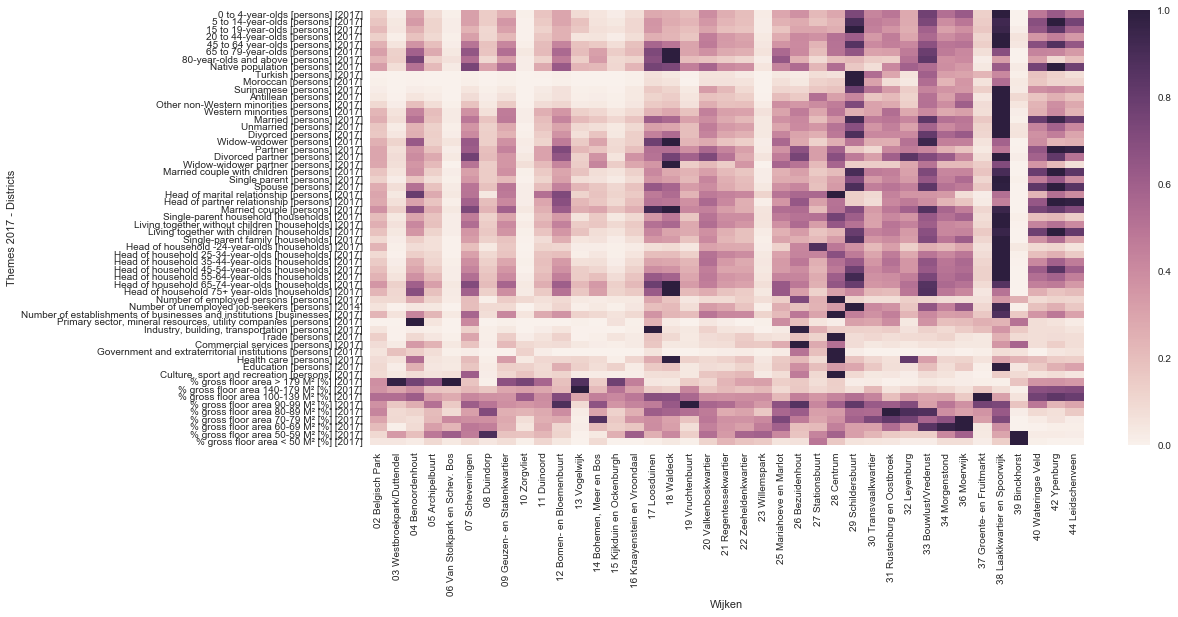

In [7]:
plt.figure(figsize = (16,8))

sns.heatmap(df_ori_demo2017.T)

# Start to do NMF with the Normalized data

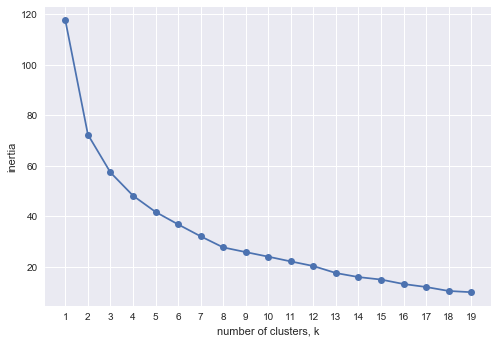

In [8]:
from sklearn.decomposition import NMF

samples = df_ori_demo2014.as_matrix()

# Loading KMeans model
# The number of clusters
N_com = 7

model1 = NMF(n_components = N_com)

# Clustering the data
model1.fit(samples)

# Getting the labes of the clusters
#labels = model1.predict(samples)

# Trying to find an optimal number of clusters using inertia
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## NMF 2017 demographic data

In [9]:
model = NMF(n_components = N_com)
W2017 = model.fit_transform(df_ori_demo2017)
H2017 = model.components_

In [10]:
district_name = df_ori_demo2017.index
variable_name = df_ori_demo2017.columns

NMF_W_2017 = pd.DataFrame(index=district_name, columns= list(range(0, N_com)))
NMF_H_2017 = pd.DataFrame(index= list(range(0, N_com)) , columns= variable_name)

NMF_W_2017.loc[:,:] = W2017
NMF_H_2017.loc[:,:] = H2017

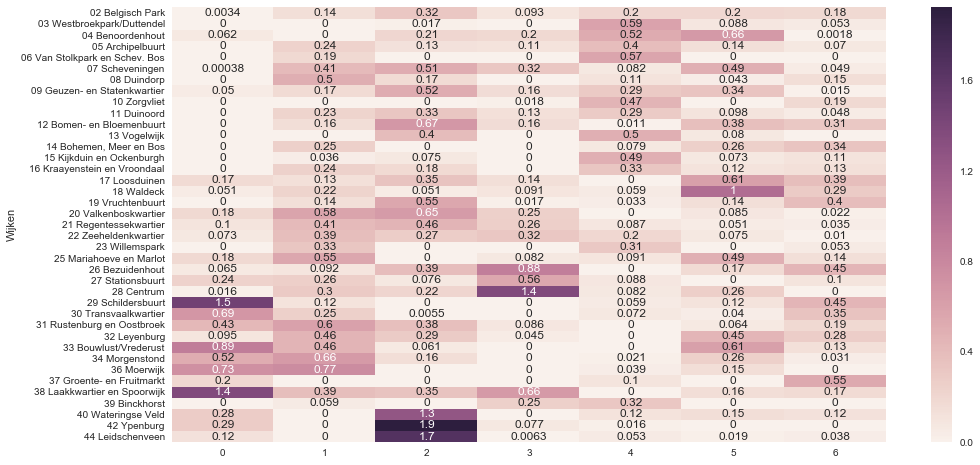

In [11]:
plt.figure(figsize = (16,8))
sns.heatmap(NMF_W_2017, annot = True)

D:\Anaconda\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


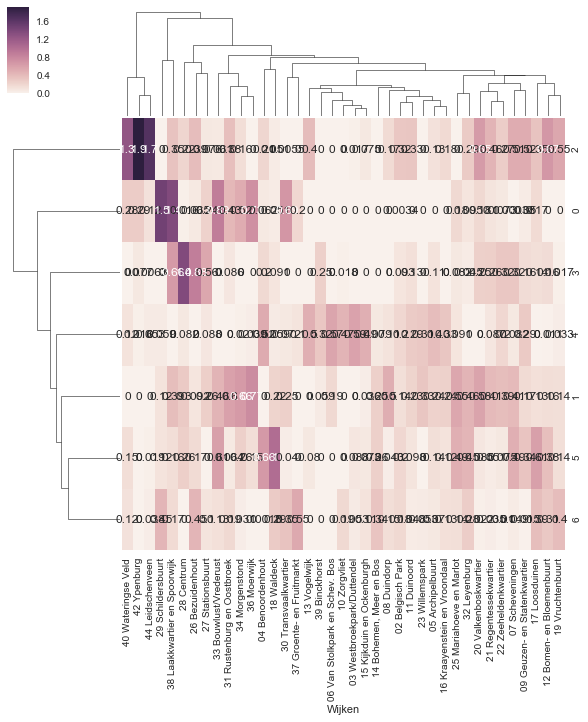

In [12]:
plt.figure(figsize = (16,8))
sns.clustermap(NMF_W_2017.T, annot = True)

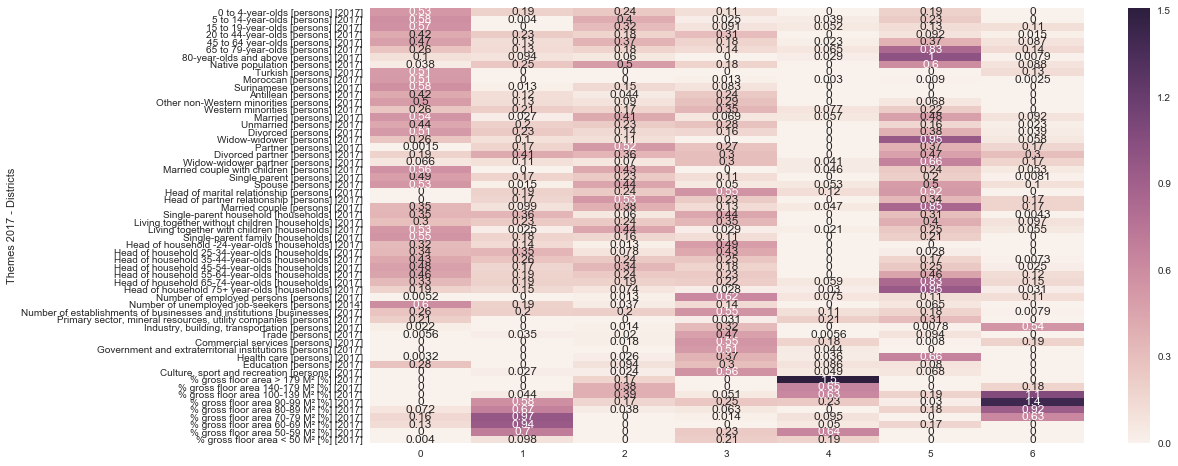

In [13]:
plt.figure(figsize = (16,8))
sns.heatmap(NMF_H_2017.T, annot = True)

In [14]:
variable_name

Index(['0 to 4-year-olds [persons] [2017]',
       '5 to 14-year-olds [persons] [2017]',
       '15 to 19-year-olds [persons] [2017]',
       '20 to 44-year-olds [persons] [2017]',
       '45 to 64 year-olds [persons] [2017]',
       '65 to 79-year-olds [persons] [2017]',
       '80-year-olds and above [persons] [2017]',
       'Native population [persons] [2017]', 'Turkish [persons] [2017]',
       'Moroccan [persons] [2017]', 'Surinamese [persons] [2017]',
       'Antillean [persons] [2017]',
       'Other non-Western minorities [persons] [2017]',
       'Western minorities [persons] [2017]', 'Married [persons] [2017]',
       'Unmarried [persons] [2017]', 'Divorced [persons] [2017]',
       'Widow-widower [persons] [2017]', 'Partner [persons] [2017]',
       'Divorced partner [persons] [2017]',
       'Widow-widower partner [persons] [2017]',
       'Married couple with children [persons] [2017]',
       'Single parent [persons] [2017]', 'Spouse [persons] [2017]',
       'Head of ma

In [15]:
NMF_H_2017.columns

Index(['0 to 4-year-olds [persons] [2017]',
       '5 to 14-year-olds [persons] [2017]',
       '15 to 19-year-olds [persons] [2017]',
       '20 to 44-year-olds [persons] [2017]',
       '45 to 64 year-olds [persons] [2017]',
       '65 to 79-year-olds [persons] [2017]',
       '80-year-olds and above [persons] [2017]',
       'Native population [persons] [2017]', 'Turkish [persons] [2017]',
       'Moroccan [persons] [2017]', 'Surinamese [persons] [2017]',
       'Antillean [persons] [2017]',
       'Other non-Western minorities [persons] [2017]',
       'Western minorities [persons] [2017]', 'Married [persons] [2017]',
       'Unmarried [persons] [2017]', 'Divorced [persons] [2017]',
       'Widow-widower [persons] [2017]', 'Partner [persons] [2017]',
       'Divorced partner [persons] [2017]',
       'Widow-widower partner [persons] [2017]',
       'Married couple with children [persons] [2017]',
       'Single parent [persons] [2017]', 'Spouse [persons] [2017]',
       'Head of ma

D:\Anaconda\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


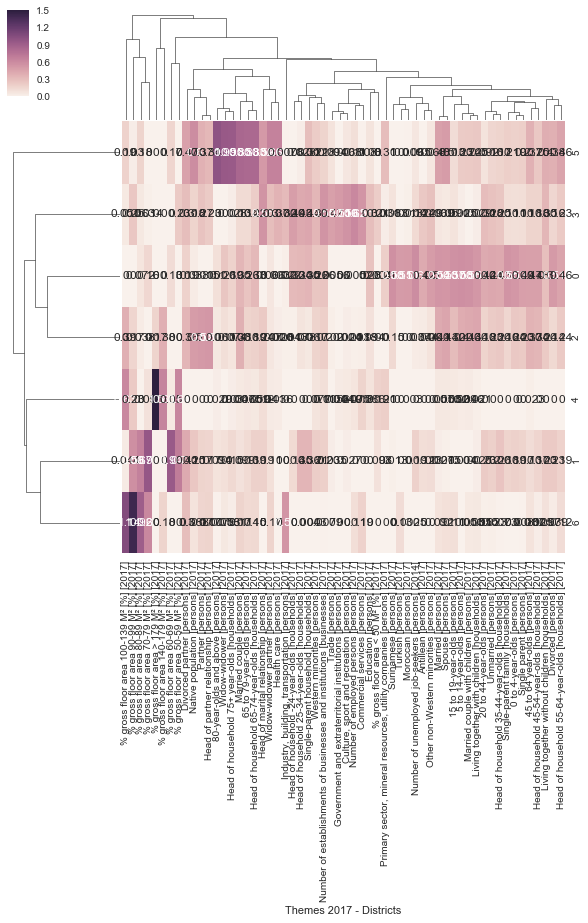

In [16]:
plt.figure(figsize = (16,8))
sns.clustermap(NMF_H_2017, annot = True)



## NMF 2014 demographic data

In [17]:
model = NMF(n_components = N_com)
W2014 = model.fit_transform(df_ori_demo2014)
H2014 = model.components_

In [18]:
district_name = df_ori_demo2014.index
variable_name = df_ori_demo2014.columns

NMF_W_2014 = pd.DataFrame(index=district_name, columns= list(range(0, N_com)))
NMF_H_2014 = pd.DataFrame(index= list(range(0, N_com)) , columns= variable_name)

NMF_W_2014.loc[:,:] = W2014
NMF_H_2014.loc[:,:] = H2014

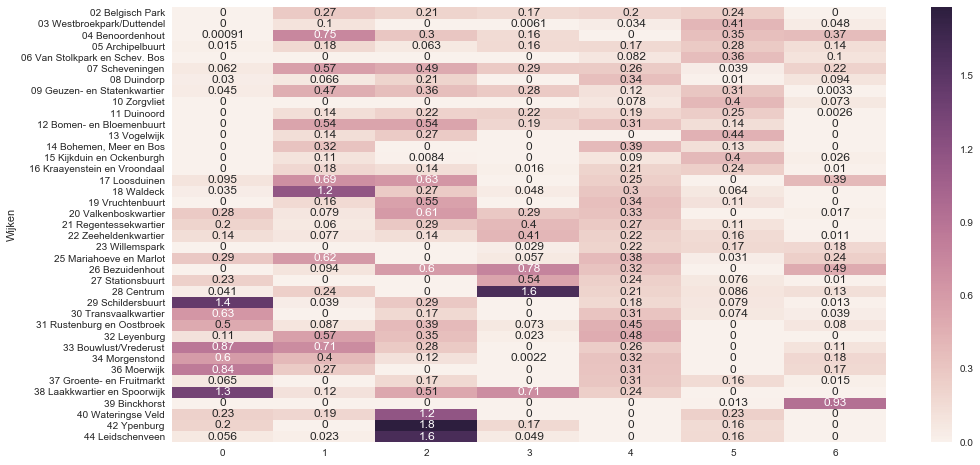

In [19]:
plt.figure(figsize = (16,8))
sns.heatmap(NMF_W_2014, annot = True)

D:\Anaconda\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


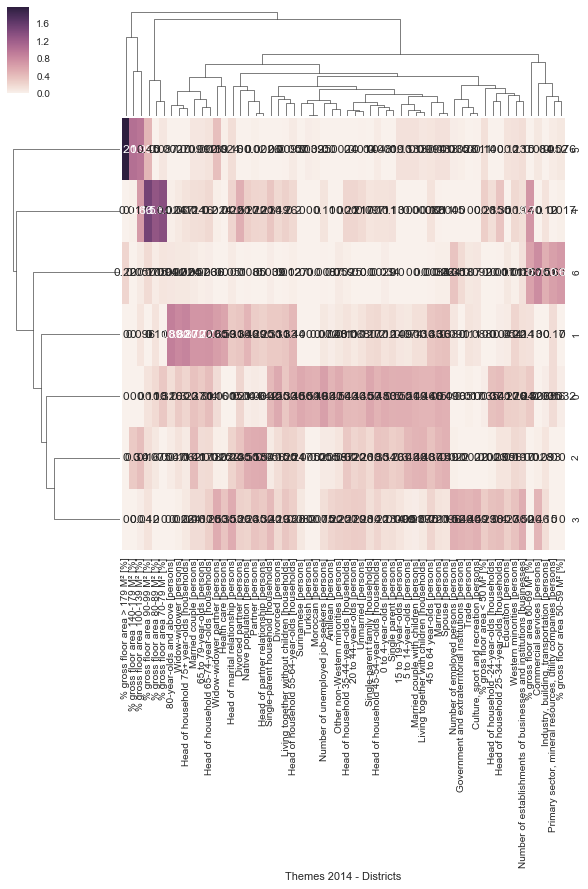

In [20]:
plt.figure(figsize = (16,8))
sns.clustermap(NMF_H_2014, annot = True)

## NMF 2014 voting data

In [21]:
model = NMF(n_components = N_com)
W_vote_2014 = model.fit_transform(df_ori_vote2014)
H_vote_2014 = model.components_

In [22]:
district_name = df_ori_vote2014.index
variable_name = df_ori_vote2014.columns

NMF_vote_W_2014 = pd.DataFrame(index=district_name, columns= list(range(0, N_com)))
NMF_vote_H_2014 = pd.DataFrame(index= list(range(0, N_com)) , columns= variable_name)

NMF_vote_W_2014.loc[:,:] = W_vote_2014
NMF_vote_H_2014.loc[:,:] = H_vote_2014

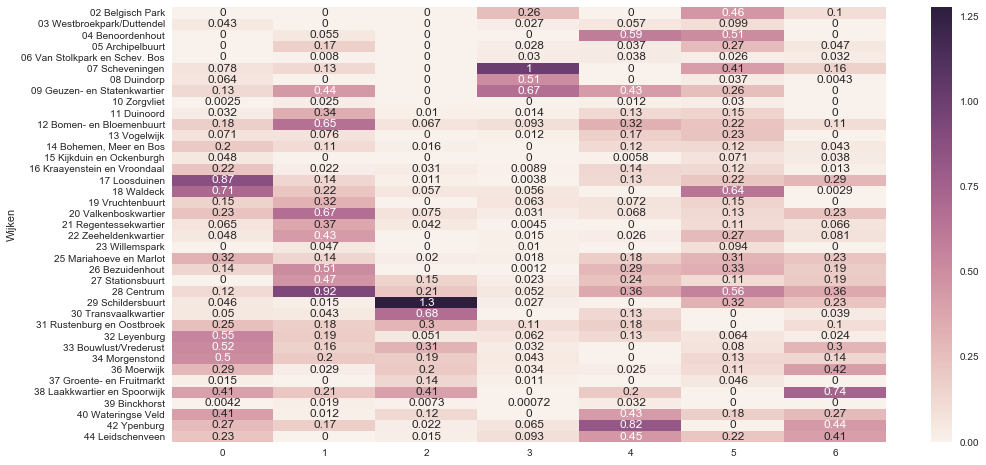

In [23]:
plt.figure(figsize = (16,8))
sns.heatmap(NMF_vote_W_2014, annot = True)

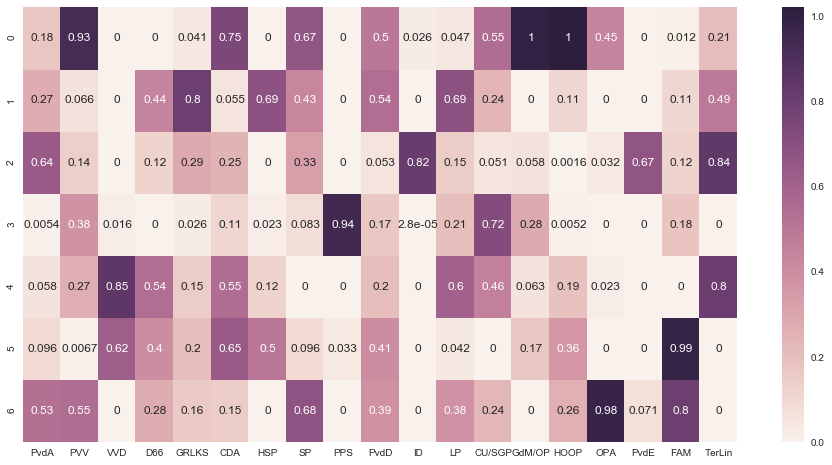

In [24]:
plt.figure(figsize = (16,8))
sns.heatmap(NMF_vote_H_2014, annot = True)

## Multi linear regression Machine learning

In [25]:
from sklearn.linear_model import LinearRegression

lnr = LinearRegression()
lnr.fit(NMF_W_2014, df_vote2014)

forecast_set0 = lnr.predict(NMF_W_2017)

In [26]:
df_vote2014

,PvdA,PVV,VVD,D66,GRLKS,CDA,HSP,SP,PPS,PvdD,ID,LP,CU/SGP,GdM/OP,HOOP,OPA,PvdE,FAM,TerLin
Wijken,,,,,,,,,,,,,,,,,,,
02 Belgisch Park,208,412,572,517,107,245,357,104,223,66,6,3,70,158,22,1,4,9,0
03 Westbroekpark/Duttendel,55,118,282,180,51,97,142,20,50,27,1,0,28,29,18,1,3,1,1
04 Benoordenhout,345,338,2046,1520,271,594,1150,97,24,106,7,11,92,108,34,1,1,4,6
05 Archipelbuurt,195,172,426,516,133,125,721,68,11,62,5,8,37,49,11,1,1,5,2
06 Van Stolkpark en Schev. Bos,29,38,127,87,19,27,72,5,21,3,1,4,20,21,2,1,1,1,0
07 Scheveningen,410,1110,604,728,229,428,679,267,842,168,17,15,298,537,32,5,13,9,0
08 Duindorp,79,746,50,81,39,86,154,86,415,30,2,0,152,215,8,0,5,2,0
09 Geuzen- en Statenkwartier,606,858,1106,1471,479,532,1287,274,513,156,7,23,397,395,53,2,20,5,9
10 Zorgvliet,40,33,97,148,37,25,127,12,2,7,0,0,4,13,2,0,0,0,0


In [27]:
df_vote2017_0 = df_vote2014.copy()
df_vote2017_0.loc[:,:] = forecast_set0

In [28]:
df_vote2017_0 = df_vote2017_0.abs().round(0)

In [29]:
df_vote2017_0

,PvdA,PVV,VVD,D66,GRLKS,CDA,HSP,SP,PPS,PvdD,ID,LP,CU/SGP,GdM/OP,HOOP,OPA,PvdE,FAM,TerLin
Wijken,,,,,,,,,,,,,,,,,,,
02 Belgisch Park,232.0,393.0,477.0,591.0,178.0,218.0,449.0,123.0,57.0,71.0,28.0,8.0,88.0,163.0,26.0,3.0,26.0,3.0,4.0
03 Westbroekpark/Duttendel,116.0,11.0,98.0,51.0,168.0,54.0,338.0,7.0,16.0,40.0,72.0,2.0,46.0,21.0,12.0,0.0,160.0,1.0,4.0
04 Benoordenhout,267.0,714.0,1238.0,831.0,283.0,21.0,936.0,272.0,164.0,32.0,135.0,9.0,26.0,487.0,6.0,1.0,219.0,2.0,10.0
05 Archipelbuurt,174.0,396.0,296.0,485.0,229.0,192.0,584.0,148.0,70.0,86.0,20.0,7.0,98.0,211.0,32.0,2.0,90.0,2.0,4.0
06 Van Stolkpark en Schev. Bos,56.0,376.0,174.0,102.0,194.0,78.0,406.0,146.0,82.0,73.0,41.0,3.0,85.0,249.0,28.0,1.0,125.0,1.0,3.0
07 Scheveningen,427.0,485.0,1448.0,1411.0,341.0,482.0,1090.0,155.0,40.0,128.0,24.0,16.0,148.0,151.0,48.0,4.0,44.0,5.0,8.0
08 Duindorp,471.0,982.0,246.0,493.0,151.0,432.0,432.0,343.0,182.0,110.0,28.0,6.0,138.0,578.0,51.0,4.0,58.0,5.0,1.0
09 Geuzen- en Statenkwartier,267.0,354.0,889.0,930.0,279.0,275.0,738.0,100.0,11.0,94.0,68.0,12.0,118.0,84.0,34.0,3.0,64.0,3.0,8.0
10 Zorgvliet,10.0,186.0,208.0,37.0,139.0,11.0,224.0,77.0,53.0,43.0,57.0,2.0,47.0,116.0,13.0,1.0,92.0,0.0,2.0


In [30]:
df_vote2017_0.append(df_vote2017_0.sum(numeric_only=True), ignore_index=True)
df_vote2017_0

,PvdA,PVV,VVD,D66,GRLKS,CDA,HSP,SP,PPS,PvdD,ID,LP,CU/SGP,GdM/OP,HOOP,OPA,PvdE,FAM,TerLin
Wijken,,,,,,,,,,,,,,,,,,,
02 Belgisch Park,232.0,393.0,477.0,591.0,178.0,218.0,449.0,123.0,57.0,71.0,28.0,8.0,88.0,163.0,26.0,3.0,26.0,3.0,4.0
03 Westbroekpark/Duttendel,116.0,11.0,98.0,51.0,168.0,54.0,338.0,7.0,16.0,40.0,72.0,2.0,46.0,21.0,12.0,0.0,160.0,1.0,4.0
04 Benoordenhout,267.0,714.0,1238.0,831.0,283.0,21.0,936.0,272.0,164.0,32.0,135.0,9.0,26.0,487.0,6.0,1.0,219.0,2.0,10.0
05 Archipelbuurt,174.0,396.0,296.0,485.0,229.0,192.0,584.0,148.0,70.0,86.0,20.0,7.0,98.0,211.0,32.0,2.0,90.0,2.0,4.0
06 Van Stolkpark en Schev. Bos,56.0,376.0,174.0,102.0,194.0,78.0,406.0,146.0,82.0,73.0,41.0,3.0,85.0,249.0,28.0,1.0,125.0,1.0,3.0
07 Scheveningen,427.0,485.0,1448.0,1411.0,341.0,482.0,1090.0,155.0,40.0,128.0,24.0,16.0,148.0,151.0,48.0,4.0,44.0,5.0,8.0
08 Duindorp,471.0,982.0,246.0,493.0,151.0,432.0,432.0,343.0,182.0,110.0,28.0,6.0,138.0,578.0,51.0,4.0,58.0,5.0,1.0
09 Geuzen- en Statenkwartier,267.0,354.0,889.0,930.0,279.0,275.0,738.0,100.0,11.0,94.0,68.0,12.0,118.0,84.0,34.0,3.0,64.0,3.0,8.0
10 Zorgvliet,10.0,186.0,208.0,37.0,139.0,11.0,224.0,77.0,53.0,43.0,57.0,2.0,47.0,116.0,13.0,1.0,92.0,0.0,2.0


## polynomial regression

In [31]:
from sklearn.linear_model import LinearRegression

lnr1 = LinearRegression()
lnr1.fit(NMF_W_2014, df_vote2014)

from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree =4)

poly_2014 = polyreg.fit_transform(NMF_W_2014)
poly_2017 = polyreg.fit_transform(NMF_W_2017)
polyreg.fit(poly_2014,df_vote2014)

lnr2 = LinearRegression()
lnr2.fit(poly_2014, df_vote2014)

forecast_set = lnr2.predict(poly_2017)

In [32]:
df_vote2014

,PvdA,PVV,VVD,D66,GRLKS,CDA,HSP,SP,PPS,PvdD,ID,LP,CU/SGP,GdM/OP,HOOP,OPA,PvdE,FAM,TerLin
Wijken,,,,,,,,,,,,,,,,,,,
02 Belgisch Park,208,412,572,517,107,245,357,104,223,66,6,3,70,158,22,1,4,9,0
03 Westbroekpark/Duttendel,55,118,282,180,51,97,142,20,50,27,1,0,28,29,18,1,3,1,1
04 Benoordenhout,345,338,2046,1520,271,594,1150,97,24,106,7,11,92,108,34,1,1,4,6
05 Archipelbuurt,195,172,426,516,133,125,721,68,11,62,5,8,37,49,11,1,1,5,2
06 Van Stolkpark en Schev. Bos,29,38,127,87,19,27,72,5,21,3,1,4,20,21,2,1,1,1,0
07 Scheveningen,410,1110,604,728,229,428,679,267,842,168,17,15,298,537,32,5,13,9,0
08 Duindorp,79,746,50,81,39,86,154,86,415,30,2,0,152,215,8,0,5,2,0
09 Geuzen- en Statenkwartier,606,858,1106,1471,479,532,1287,274,513,156,7,23,397,395,53,2,20,5,9
10 Zorgvliet,40,33,97,148,37,25,127,12,2,7,0,0,4,13,2,0,0,0,0


In [33]:
df_vote2017_1 = df_vote2014.copy()
df_vote2017_1.loc[:,:] = forecast_set

In [34]:
df_vote2017_1 = df_vote2017_1.abs().round(0)

In [35]:
df_vote2017_1

,PvdA,PVV,VVD,D66,GRLKS,CDA,HSP,SP,PPS,PvdD,ID,LP,CU/SGP,GdM/OP,HOOP,OPA,PvdE,FAM,TerLin
Wijken,,,,,,,,,,,,,,,,,,,
02 Belgisch Park,139.0,424.0,361.0,223.0,88.0,140.0,288.0,64.0,245.0,22.0,44.0,9.0,129.0,198.0,13.0,3.0,19.0,5.0,1.0
03 Westbroekpark/Duttendel,398.0,1324.0,66.0,210.0,237.0,734.0,193.0,353.0,77.0,78.0,578.0,17.0,140.0,205.0,98.0,3.0,75.0,6.0,2.0
04 Benoordenhout,204.0,1848.0,754.0,985.0,578.0,873.0,2144.0,237.0,1030.0,101.0,253.0,54.0,458.0,372.0,191.0,9.0,98.0,17.0,9.0
05 Archipelbuurt,142.0,14.0,226.0,90.0,16.0,81.0,286.0,49.0,114.0,15.0,4.0,7.0,47.0,64.0,21.0,1.0,67.0,7.0,4.0
06 Van Stolkpark en Schev. Bos,156.0,377.0,164.0,461.0,281.0,424.0,607.0,90.0,155.0,29.0,203.0,0.0,1.0,147.0,39.0,3.0,2.0,5.0,4.0
07 Scheveningen,1171.0,548.0,1247.0,3290.0,1493.0,402.0,3601.0,551.0,19.0,231.0,156.0,62.0,623.0,527.0,5.0,9.0,54.0,25.0,37.0
08 Duindorp,626.0,1787.0,1151.0,781.0,100.0,1082.0,122.0,443.0,464.0,234.0,290.0,10.0,332.0,567.0,142.0,5.0,20.0,5.0,9.0
09 Geuzen- en Statenkwartier,381.0,586.0,383.0,1072.0,635.0,18.0,1311.0,122.0,415.0,52.0,172.0,14.0,4.0,54.0,44.0,5.0,17.0,5.0,6.0
10 Zorgvliet,229.0,265.0,82.0,380.0,180.0,298.0,565.0,99.0,144.0,2.0,43.0,19.0,6.0,93.0,41.0,4.0,52.0,3.0,1.0


In [36]:
df_vote2017_1.append(df_vote2017_1.sum(numeric_only=True), ignore_index=True)
df_vote2017_1

,PvdA,PVV,VVD,D66,GRLKS,CDA,HSP,SP,PPS,PvdD,ID,LP,CU/SGP,GdM/OP,HOOP,OPA,PvdE,FAM,TerLin
Wijken,,,,,,,,,,,,,,,,,,,
02 Belgisch Park,139.0,424.0,361.0,223.0,88.0,140.0,288.0,64.0,245.0,22.0,44.0,9.0,129.0,198.0,13.0,3.0,19.0,5.0,1.0
03 Westbroekpark/Duttendel,398.0,1324.0,66.0,210.0,237.0,734.0,193.0,353.0,77.0,78.0,578.0,17.0,140.0,205.0,98.0,3.0,75.0,6.0,2.0
04 Benoordenhout,204.0,1848.0,754.0,985.0,578.0,873.0,2144.0,237.0,1030.0,101.0,253.0,54.0,458.0,372.0,191.0,9.0,98.0,17.0,9.0
05 Archipelbuurt,142.0,14.0,226.0,90.0,16.0,81.0,286.0,49.0,114.0,15.0,4.0,7.0,47.0,64.0,21.0,1.0,67.0,7.0,4.0
06 Van Stolkpark en Schev. Bos,156.0,377.0,164.0,461.0,281.0,424.0,607.0,90.0,155.0,29.0,203.0,0.0,1.0,147.0,39.0,3.0,2.0,5.0,4.0
07 Scheveningen,1171.0,548.0,1247.0,3290.0,1493.0,402.0,3601.0,551.0,19.0,231.0,156.0,62.0,623.0,527.0,5.0,9.0,54.0,25.0,37.0
08 Duindorp,626.0,1787.0,1151.0,781.0,100.0,1082.0,122.0,443.0,464.0,234.0,290.0,10.0,332.0,567.0,142.0,5.0,20.0,5.0,9.0
09 Geuzen- en Statenkwartier,381.0,586.0,383.0,1072.0,635.0,18.0,1311.0,122.0,415.0,52.0,172.0,14.0,4.0,54.0,44.0,5.0,17.0,5.0,6.0
10 Zorgvliet,229.0,265.0,82.0,380.0,180.0,298.0,565.0,99.0,144.0,2.0,43.0,19.0,6.0,93.0,41.0,4.0,52.0,3.0,1.0


In [37]:
# total2014 =  df_ori_vote2014.apply(lambda x: x.sum(), axis = 0)
total2017 =  df_vote2017_1.apply(lambda x: x.sum(), axis = 0)
total2017

PvdA      23363.0
PVV       44840.0
VVD       29229.0
D66       48605.0
GRLKS     24376.0
CDA       24514.0
HSP       57680.0
SP        14583.0
PPS       17873.0
PvdD       6991.0
ID        21355.0
LP         1186.0
CU/SGP    10728.0
GdM/OP    17818.0
HOOP       3984.0
OPA         347.0
PvdE      12545.0
FAM         914.0
TerLin      969.0
dtype: float64